In [ ]:
import dash
from dash import html, dcc
import pandas as pd
import plotly.graph_objs as go
import py3Dmol

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
data = pd.read_csv('importFileTest.csv')  # Replace with your CSV file path

def plotly_line_graph():
    # Read CSV file into Pandas DataFrame
    # data = pd.read_csv('importFileTest.csv')  # Replace with your CSV file path

    # Create a Plotly figure with an interactive line graph
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['source'], y=data['target'], mode='lines', name='Line Plot', marker=dict(color='#32CD32')))
    fig.update_layout(title='Plotly Line Graph in Dash', xaxis_title='X-axis', yaxis_title='Y-axis')

    return dcc.Graph(figure=fig)


def plotly_freq_hist():
    # Read CSV file into Pandas DataFrame
    # data = pd.read_csv('/Users/davidfoutch/Desktop/QT_4PyMOL/importFileTest.csv')

    # Create a Plotly figure with an interactive histogram
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=data['target'], histnorm='probability density', name='Density Line', marker=dict(color='orange')))
    fig.update_layout(title='Density Histogram with Density Line in Dash', xaxis_title='Y-axis', yaxis_title='Probability', bargap=0.2)

    return dcc.Graph(figure=fig)


def plotly_network():
    edge_list_file = "1yok.txt"  # Replace with your file path

    # Read edge list file and process data
    edges = []
    with open(edge_list_file, "r") as file:
        for line in file:
            source, target, *_ = line.strip().split()  # Assuming at least two columns separated by space or tab
            edges.append({'from': source, 'to': target})

    all_nodes = set()
    for edge in edges:
        all_nodes.add(edge['from'])
        all_nodes.add(edge['to'])

    nodes = []
    node_id_mapping = {}
    for idx, node in enumerate(all_nodes):
        node_id = idx + 1
        nodes.append({'id': node_id, 'label': node, 'title': f'Description for {node}'})
        node_id_mapping[node] = node_id

    for edge in edges:
        edge['from'] = node_id_mapping[edge['from']]
        edge['to'] = node_id_mapping[edge['to']]

    # Generating the HTML content for network visualization
    html_content = f"""
    <div id="network-container" style="width: 100%; height: 90vh; border: 1px solid lightgray;"></div>

    <script type="text/javascript" src="https://unpkg.com/vis-network/standalone/umd/vis-network.min.js"></script>
    <script type="text/javascript">
        var nodes = new vis.DataSet({nodes});
        var edges = new vis.DataSet({edges});

        var container = document.getElementById('network-container');
        var data = {{ nodes: nodes, edges: edges }};
        var options = {{
            nodes: {{
                color: {{
                    border: '#708090',
                    background: '#FFA500',
                }},
            }},
        }};
        var network = new vis.Network(container, data, options);
    </script>
    """
    return html_content

app.layout = html.Div([
    html.H1("Partitioned Canvases with Plotly Line Graph"),
    html.Div([
        html.Div([html.H2("Plotly Line Graph"), plotly_line_graph()], style={'width': '100%', 'display': 'inline-block'}),
    ]),
    html.Div([
        html.Div([html.H2("Frequency Histogram"), plotly_freq_hist()], style={'width': '100%', 'display': 'inline-block'}),
    ]),
    
    html.H3("Network Visualization"),
    html.Div([
        html.Iframe(srcDoc=plotly_network(), style={'width': '100%', 'height': '90vh', 'border': 'none'})
    ]),  
])


if __name__ == '__main__':
    app.run_server(port=8070)

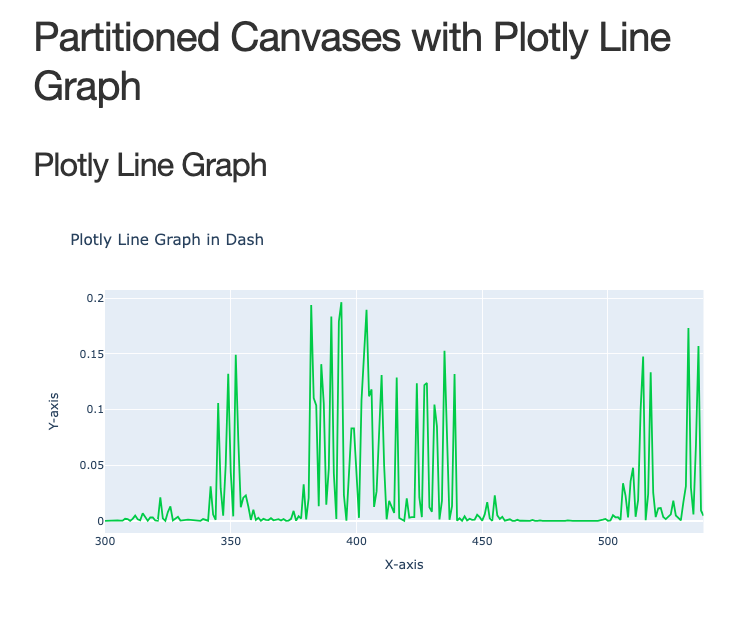

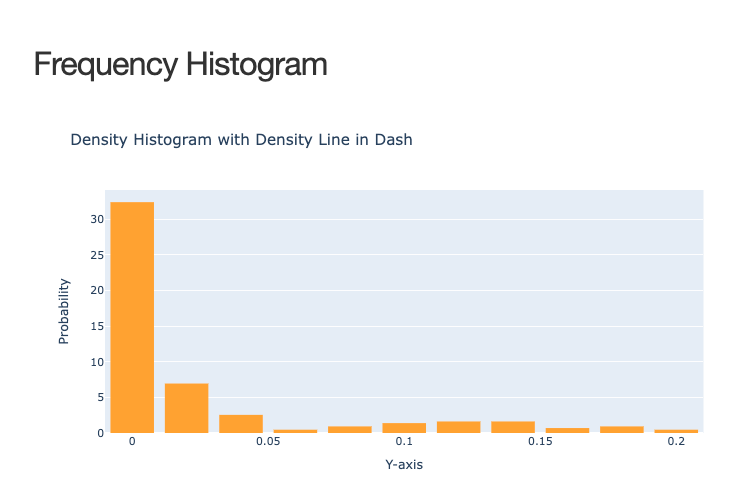

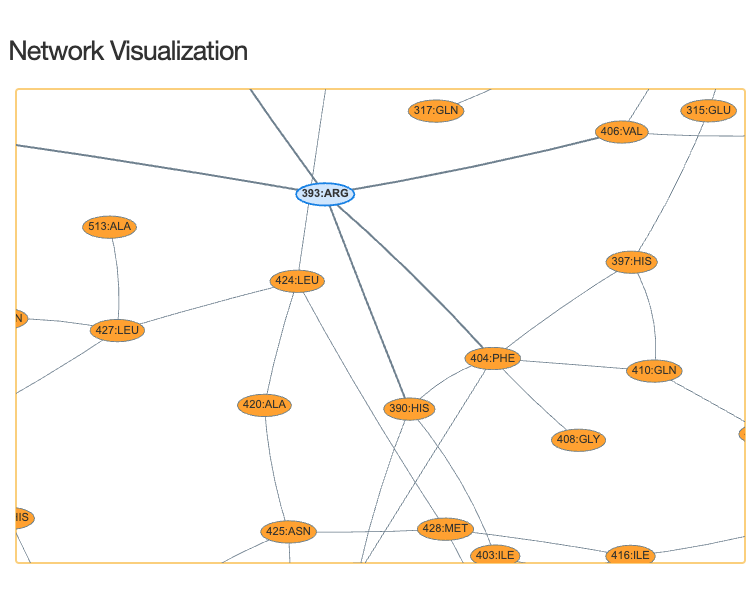